In [2]:
# get environment variables
import os
import sys
from dotenv import load_dotenv, find_dotenv

# find .env automagically by walking up directories until it's found
dotenv_path = find_dotenv()

# load up the entries as environment variables
load_dotenv(dotenv_path)

sys.path.append(os.environ.get('srcdir'))

# set up ini file
with zero velocities and zero free surface, but stable, depth dependend stratification.

In [3]:
import numpy as np
import xarray as xr
import matplotlib.pyplot as plt

In [4]:
ini_path = os.path.join(os.environ.get("rawdir"),'waom10_v2.0_small','ocean_his_make_ini.nc')
ini = xr.open_dataset(ini_path).isel(ocean_time=0)

grd_path = os.path.join(os.environ.get("prodir"),'waom10_small_grd.nc')
grd = xr.open_dataset(grd_path)

In [14]:
from features.calc_z import calc_z
h=grd.h.values
zice=grd.zice.values
theta_s=4
theta_b=0.9
N=31
hc=20

depths,s,C = calc_z(h,zice,theta_s,theta_b,hc,N)
depths=depths*-1

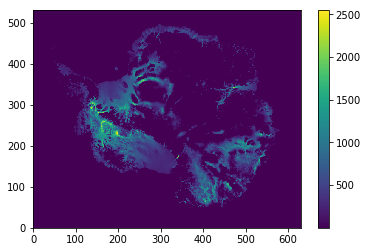

In [15]:
plt.close()
plt.pcolormesh(depths[30])
plt.colorbar()
plt.show()

In [99]:
temp = np.zeros_like(depths)
salt = np.zeros_like(depths)

for k in range(N):
    temp[k] = -(depths[k]-np.max(depths))/np.max(depths)*5
    salt[k] = 35.0+(depths[k]-np.max(depths))/np.max(depths)

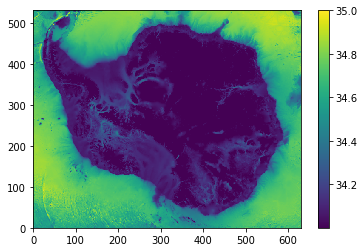

In [27]:
plt.close()
plt.pcolormesh(salt[0])
plt.colorbar()
plt.show()

In [78]:
ini.salt.values=salt
ini.temp.values=temp

In [102]:
for var in ['zeta','ubar','vbar','u','v']:
    ini[var]=ini[var]*0.0
    ini[var].values[np.isnan(ini[var].values)]=0.0

In [100]:
ini.zeta.values[np.isnan(ini.zeta.values)]=0.0

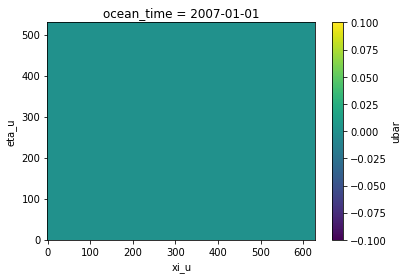

In [103]:
plt.close()
ini.ubar[0].plot()
plt.show()

In [80]:
#hr_ini.coords['ocean_time'] = lr_his.ocean_time
import pandas as pd
ini['ocean_time'] = pd.datetime(2007,1,1)
for var in ['zeta','ubar','vbar','u','v','salt','temp']:
    
    ini[var] = ini[var].expand_dims('ocean_time',0)

In [104]:
out_path = os.path.join(os.environ.get("rawdir"),'waom10_v2.0_small_zero','waom10_ini_zero.nc')
ini.to_netcdf(out_path,unlimited_dims='ocean_time')

# ana fields and boundary conditions
define ANA_BSFLUX

define ANA_BTFLUX

define ANA_SRFLUX

define ANA_SMFLUX

define ANA_STFLUX

define ANA_SSFLUX

define ANA_M2OBC

define ANA_M3OBC

define ANA_FSOBC

all boundaries for all quantities use the closed boundary condition

# Analysis of daily 3d velocities

In [34]:
#analyse bottom and surface velocities
his_path = os.path.join(os.environ.get("rawdir"),'waom10_v2.0_small_zero','ocean_his.nc')
his = xr.open_dataset(his_path).isel(s_rho=[0,30])

In [35]:
from features.rotate_vector_roms import rotate_vector_roms
from features.log_progress import log_progress

his['u_rho']=xr.DataArray(np.zeros_like(his.temp.values),dims=['ocean_time','s_rho','eta_rho','xi_rho'])
his['v_rho']=xr.DataArray(np.zeros_like(his.temp.values),dims=['ocean_time','s_rho','eta_rho','xi_rho'])

angle = np.zeros_like(grd.lon_rho.values)

for time in log_progress(range(his.ocean_time.size)):
    for k in range(his.s_rho.size):
        his.u_rho[time,k],his.v_rho[time,k] = rotate_vector_roms(his.u[time,k].values, his.v[time,k].values, angle)

VBox(children=(HTML(value=''), IntProgress(value=0, max=33)))

In [37]:
his['velo'] = xr.ufuncs.sqrt(xr.ufuncs.square(his.u_rho)+xr.ufuncs.square(his.v_rho))

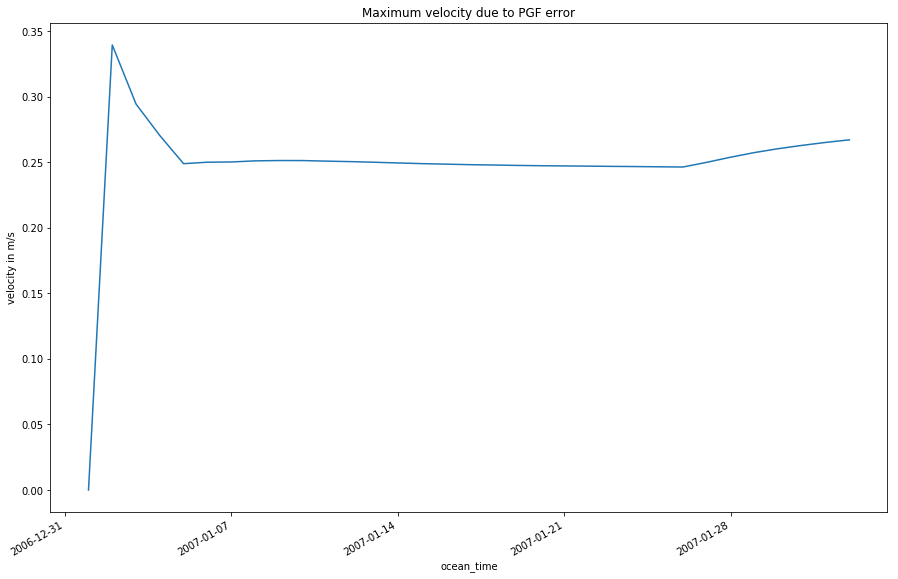

In [38]:
plt.close()
his.velo.max(['s_rho','eta_rho','xi_rho']).plot(size=10)
plt.title('Maximum velocity due to PGF error')
plt.ylabel('velocity in m/s')
plt.show()

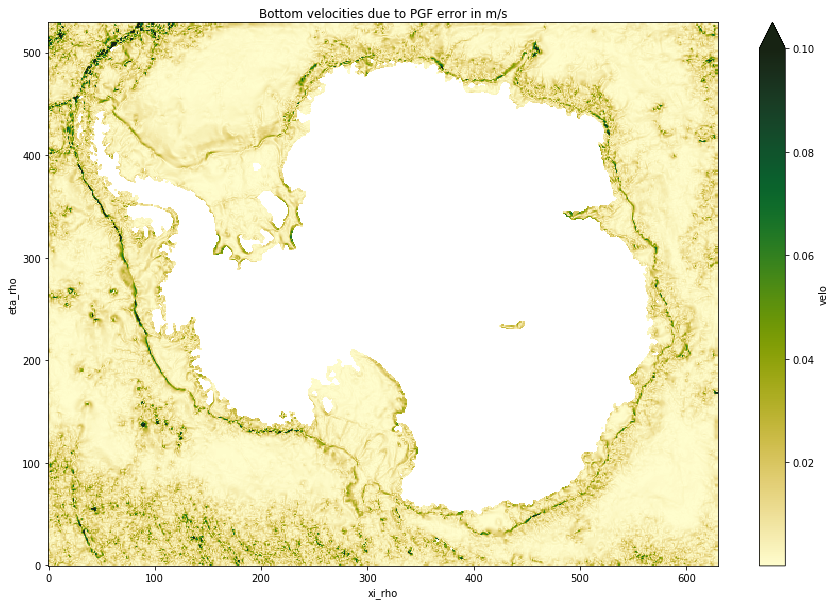

In [44]:
import cmocean.cm as ocm
plt.close()
plot = his.velo[-1,0].plot(size=10,vmax=0.1,cmap=ocm.speed)
plt.title('Bottom velocities due to PGF error in m/s')
plt.show()

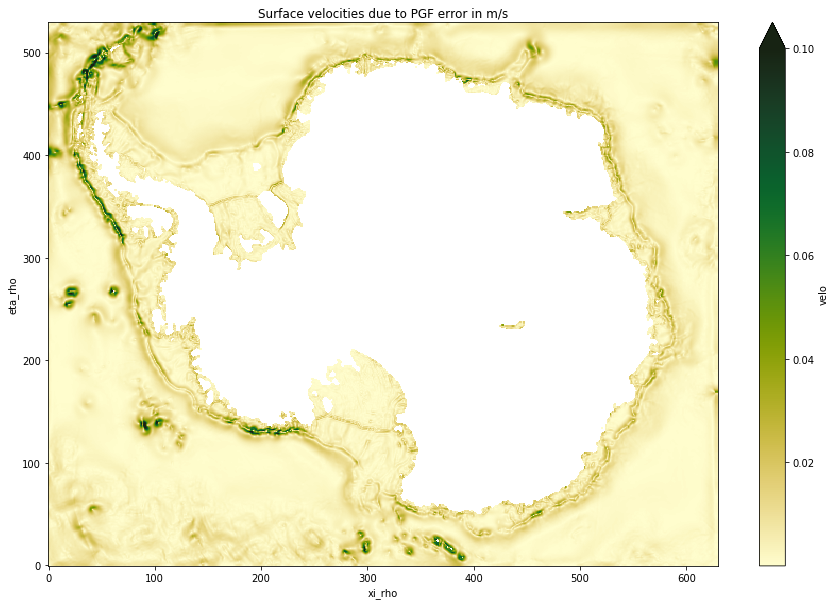

In [45]:
plt.close()
his.velo[-1,1].plot(size=10,vmax=0.1,cmap=ocm.speed)
plt.title('Surface velocities due to PGF error in m/s')
plt.show()